In [1]:
pwd

u'/Users/vasilis/Documents/courses_conferences_ppts/Ice_Core_Claciology/ICG_2016/ICG_2016_ipynb'

0.99309387815 0.95353010601
[   2.72243256 -213.73685054]


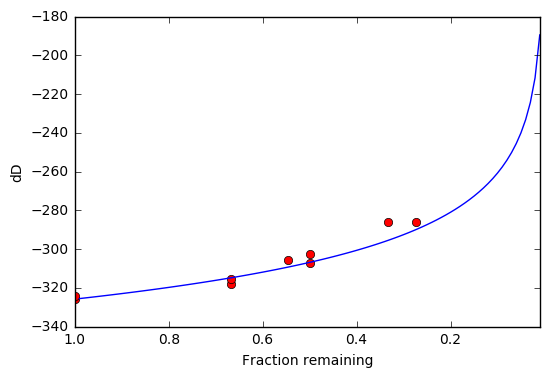

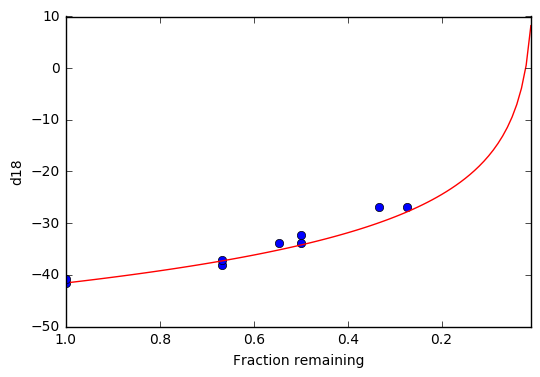

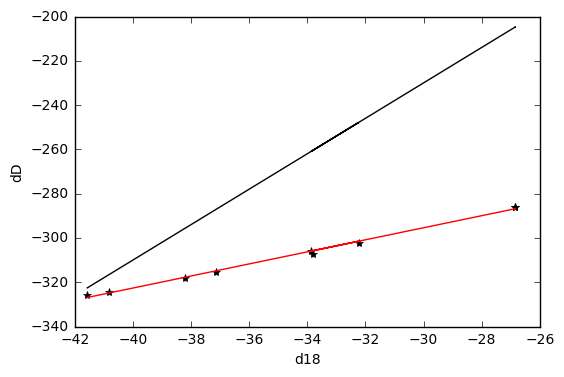

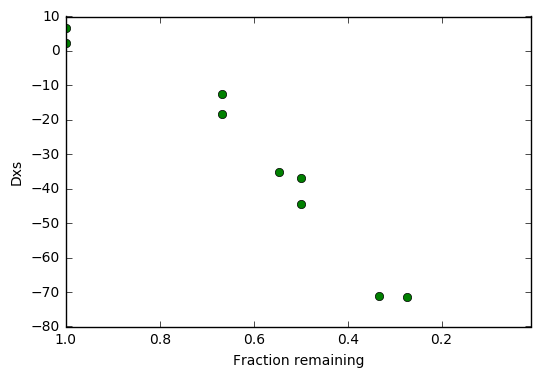

In [41]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("/Users/vasilis/")
import vaspy
from vaspy import diffusivity

def raylegh_model(f, delta_o, alpha):
    delta_o = delta_o/1000.
    delta_r = (((delta_o + 1)*f**(alpha-1)) - 1)*1000
    return delta_r


plt.ion()
data = np.genfromtxt("./FractionationExp_results.txt", skip_header = 1)
m_glass = data[:,1].astype(float)
m_tot = data[:,2]
m_evap = data[:,3]
d18 = data[:,4]
dD = data[:,5]
f = (m_evap - m_glass)/(m_tot-m_glass)


plt.figure(1)
plt.plot(f, dD, "ro")
plt.xlim([1, 0.01])
plt.xlabel("Fraction remaining")
plt.ylabel("dD")

f_fine = np.arange(0.01, 1, 0.01)
delta_r = raylegh_model(f = f_fine, delta_o = dD[0], alpha = 0.96)
plt.plot(f_fine, delta_r, "b")


temp_evap = 60+273.15
fr_factor_inst = diffusivity.FractionationFactor(T = temp_evap)
fr_factor_d18 = fr_factor_inst.o18_liquid()
fr_factor_dD = fr_factor_inst.deuterium_liquid()

print 1./fr_factor_d18, 1./fr_factor_dD


#########d18 block############
plt.figure(2)
plt.plot(f, d18, "bo")
plt.xlim([1, 0.01])
plt.xlabel("Fraction remaining")
plt.ylabel("d18")

delta_r = raylegh_model(f = f_fine, delta_o = d18[0], alpha = 0.989)
plt.plot(f_fine, delta_r, "r")

plt.figure(3)
plt.plot(d18, dD, "k*")
p1 = np.polyfit(d18, dD, 1)
print(p1)
line_evap = np.polyval(p1, d18)
plt.plot(d18, d18*8+10, "k")
plt.plot(d18, line_evap, "r")
plt.xlabel("d18")
plt.ylabel("dD")


plt.figure(4)
plt.plot(f, dD - 8*d18, "go")
plt.xlim([1, 0.01])
plt.xlabel("Fraction remaining")
plt.ylabel("Dxs")

plt.show()